In [1]:
using ImageShow, Metal, Colors, GeometryBasics, StaticArrays, FixedPointNumbers

In [2]:

# UI
function Base.show(io::IO, mime::MIME"image/png", img::MtlArray{C}) where C<:Colorant 
    Base.show(io, mime, Array(img))
end

function Base.showable(mime::MIME"image/png", img::MtlArray{C}) where C<:Colorant 
    true
end

In [3]:

# Our basic primitive
function generate(f, img)
    r, c = Int32.(size(img))
    i,j = thread_position_in_grid_2d()
    
    @inbounds if i <= r && j <= c
        @inline img[i,j] = eltype(img)(f(i,j,r,c))
    end
    return
end


generate (generic function with 1 method)

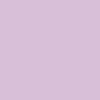

In [5]:

let 
    simple(i,j,r,c) = colorant"thistle"
    
    n = 50
    b = MtlArray{RGB{N0f8}}(undef, n,n)
    threads = 16
    groups = cld.(n, threads)
    @Metal.sync @metal threads=threads,threads groups=groups,groups generate(simple, b)
    b
end